In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import json

In [60]:
TRAIN_PATH = './adult/adult.data'
NAME_PATH = './adult/adult.names'
# TEST_PATH = './adult/adult.test'
BINARY_CLASS_PATH = './adult/adult-binary.csv'

In [61]:
df = pd.read_csv(TRAIN_PATH, header=None, index_col=None)
# df_test = pd.read_csv(TEST_PATH, header=None, index_col=None)

In [62]:
df.iloc[:, 14].replace([' <=50K', ' >50K'], [-1, 1], inplace=True)
df.iloc[:, 13] = df.iloc[:, 13].astype('category')
df.iloc[:, 9] = df.iloc[:, 9].astype('category')
df.iloc[:, 8] = df.iloc[:, 8].astype('category')
df.iloc[:, 7] = df.iloc[:, 7].astype('category')
df.iloc[:, 6] = df.iloc[:, 6].astype('category')
df.iloc[:, 5] = df.iloc[:, 5].astype('category')
df.iloc[:, 3] = df.iloc[:, 3].astype('category')
df.iloc[:, 1] = df.iloc[:, 1].astype('category')

# df.replace('x', 1, inplace=True)
# df.replace('o', -1, inplace=True)
# df.replace('win', 1, inplace=True)
# df.replace('loss', -1, inplace=True)
# df.replace('draw', 0, inplace=True)

In [63]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')


In [64]:
print(df.head())

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13  14  
0   United-States  -1  
1   United-States  -1  
2   United-States  -1  
3   United-States  -1  
4       

In [65]:
print(df.describe())

                 0             2             4             10            11  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 12            14  
count  32561.000000  32561.000000  
mean      40.437456     -0.518381  
std       12.347429      0.855163  
min        1.000000     -1.000000  
25%       40.000000     -1.000000  
50%       40.000000     -1.000000  
75%       45.000000     -1.000000  


In [66]:
print(df.dtypes)

0        int64
1     category
2        int64
3     category
4        int64
5     category
6     category
7     category
8     category
9     category
10       int64
11       int64
12       int64
13    category
14       int64
dtype: object


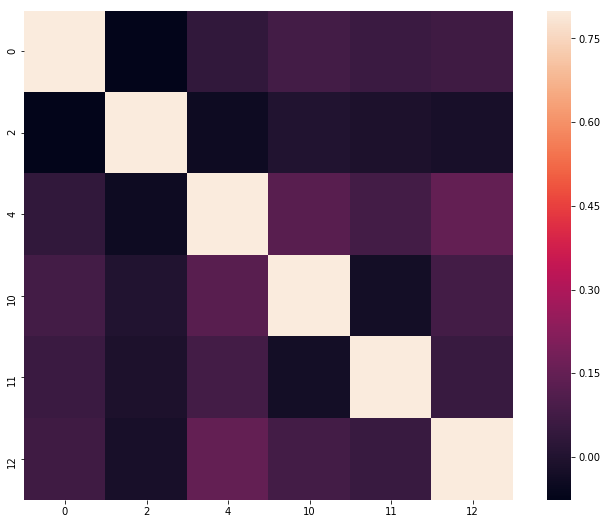

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [17]:
print(df.head())

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())
print('Any missing:\n') 
print('{}'.format(pd.isnull(df).sum()))

    Total  Percent
14      0      0.0
13      0      0.0
12      0      0.0
11      0      0.0
10      0      0.0
Any missing:

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [51]:
print(df.iloc[:, 1].unique())
# print(df_test.iloc[:, 0].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [35]:
# with open(NAME_PATH, "r") as read_file:
#     data = json.loads(read_file)
#     print(read_file)

In [29]:
df.to_csv(BINARY_CLASS_PATH, header=False, index=False)